In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
!ls

AAPL.csv    fb.ipynb  __pycache__			TSLAdata.csv
AMZN.csv    GOOG.csv  Stock-Predictor-using-LSTM.ipynb
FB.csv	    lstm.py   Test.ipynb
FBdata.csv  NFLX.csv  TSLA.csv


In [3]:
col_names = ['Timestamp','Sequence','Open','High','Low','Close','Volume']
tesla = pd.read_csv('GOOG.csv')
tesla.columns = col_names
tesla['Timestamp'] =  pd.to_datetime(tesla['Timestamp'],format='%Y-%m-%d %H:%M:%S')
tesla.index = tesla['Timestamp']
tesla.head()

,Timestamp,Sequence,Open,High,Low,Close,Volume
Timestamp,,,,,,,
2018-03-12 15:46:00,2018-03-12 15:46:00,a1520869560,1171.1950,1171.78,1170.8517,1171.5400,7176
2018-03-12 15:47:00,2018-03-12 15:47:00,1,1171.3297,1171.78,1171.0838,1171.7800,2133
2018-03-12 15:48:00,2018-03-12 15:48:00,2,1171.6500,1171.65,1171.1600,1171.4500,2000
2018-03-12 15:49:00,2018-03-12 15:49:00,3,1171.9900,1172.01,1171.4961,1171.4961,1949
2018-03-12 15:50:00,2018-03-12 15:50:00,4,1171.4100,1171.67,1171.2200,1171.6000,800


In [30]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30788 entries, 2018-03-12 15:46:00 to 2018-07-06 20:00:00
Data columns (total 7 columns):
Timestamp    30788 non-null datetime64[ns]
Sequence     30788 non-null object
Open         30788 non-null float64
High         30788 non-null float64
Low          30788 non-null float64
Close        30788 non-null float64
Volume       30788 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.1+ MB


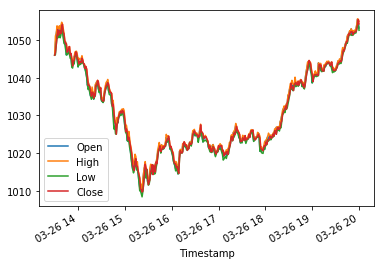

In [96]:
df = tesla.loc['2018-03-26':'2018-03-26'][['Open','High','Low','Close']]
df.plot()

In [97]:
df.shape

(389, 4)

In [98]:
df = df.reset_index()

In [99]:
df.describe()

,Open,High,Low,Close
count,389.000000,389.000000,389.000000,389.000000
mean,1031.254140,1031.936498,1030.604140,1031.263224
std,11.379703,11.337249,11.367732,11.355548
min,1009.680000,1010.310000,1008.400000,1009.680000
25%,1022.000000,1022.510000,1021.560000,1022.000000
50%,1026.880000,1027.493900,1025.990000,1026.850000
75%,1041.750000,1042.365000,1041.324000,1041.890000
max,1055.475000,1055.630000,1054.350000,1055.450000


In [100]:
df.head()

,Timestamp,Open,High,Low,Close
0,2018-03-26 13:30:00,1046.00,1046.00,1046.0000,1046.00
1,2018-03-26 13:31:00,1049.01,1051.10,1046.1800,1046.70
2,2018-03-26 13:32:00,1051.65,1051.65,1048.5401,1048.77
3,2018-03-26 13:33:00,1053.00,1053.78,1050.9100,1051.05
4,2018-03-26 13:34:00,1050.60,1053.16,1050.6000,1052.78


In [101]:
df = df[['Close','Timestamp']]

In [102]:
df['ds'] = df.Timestamp
df['y'] = pd.DataFrame(df['Close'])

In [103]:
df.pop('Close')
df.pop('Timestamp')
df.head()

,ds,y
0,2018-03-26 13:30:00,1046.00
1,2018-03-26 13:31:00,1046.70
2,2018-03-26 13:32:00,1048.77
3,2018-03-26 13:33:00,1051.05
4,2018-03-26 13:34:00,1052.78


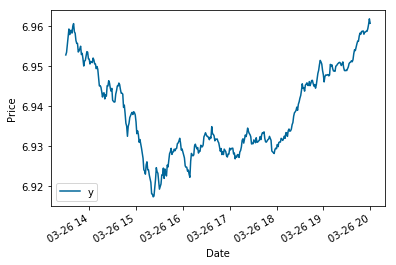

In [104]:
# log transform data
df['y'] = pd.DataFrame(np.log(df['y']))
 
# plot data
ax = df.set_index('ds').plot(color='#006699');
ax.set_ylabel('Price');
ax.set_xlabel('Date');
#plt.savefig('./img/log_transformed_passenger.png')
plt.show()

In [105]:
df.shape

(389, 2)

In [114]:
# train test split
df_train = df[:300]
df_test = df[300:]

In [122]:
# instantiate the Prophet class
mdl = Prophet(daily_seasonality=True)
 
# fit the model on the training data
mdl.fit(df_train)
 
# define future time frame
future = mdl.make_future_dataframe(periods=179, freq='M')

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/home/aurobindo/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [123]:
# generate the forecast
forecast = mdl.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
474,2032-09-30 18:31:00,11679.433604,-3.248463e+06,3.394543e+06
475,2032-10-31 18:31:00,11747.680907,-3.270058e+06,3.432611e+06
476,2032-11-30 18:31:00,11813.726684,-3.316734e+06,3.460313e+06
477,2032-12-31 18:31:00,11881.973988,-3.358952e+06,3.481674e+06
478,2033-01-31 18:31:00,11950.221291,-3.391594e+06,3.501235e+06


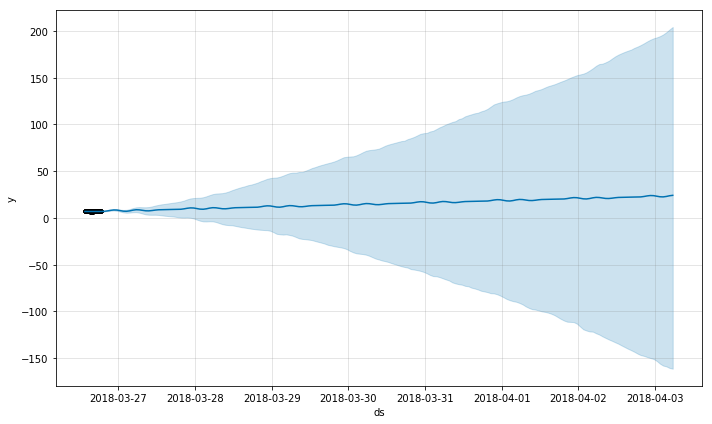

In [117]:
mdl.plot(forecast);
plt.show()

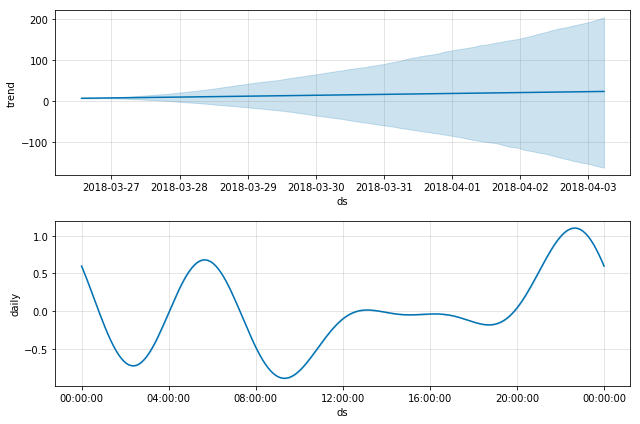

In [118]:
# plot time series components
mdl.plot_components(forecast)
plt.show()

In [119]:
y_hat = np.exp(forecast['yhat'][300:])
y_true = np.exp(df_test['y'])

In [120]:
# retransform using e
import math
y_hat = np.exp(forecast['yhat'][300:])
y_true = np.exp(df_test['y'])
 
# compute the mean square error
mse = ((y_hat - y_true) ** 2).mean()
print('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))

Prediction quality: 1470486743601.71 MSE (1212636.28 RMSE)


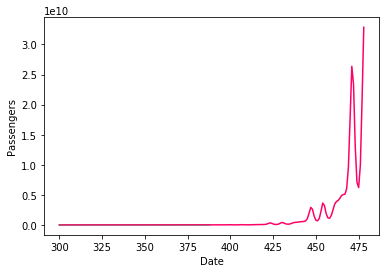

In [121]:
plt.plot(y_true, label='Original', color='#00FF90');
plt.plot(y_hat, color='#ff0066', label='Forecast');
#plt.fill_between(df_test.index,y_true, color='#ff0066', alpha=0.25)
plt.ylabel('Passengers');
plt.xlabel('Date');
#plt.savefig('./img/prophet_forecast.png')
plt.show()